# pruning in pytorch

In [2]:
import torch
from torch import nn
from torch import optim
from apex.contrib.sparsity import ASP

import matplotlib.pyplot as plt

Found permutation search CUDA kernels
[ASP][Info] permutation_search_kernels can be imported.


In [3]:
def Torch_MLPNet(dim, hidden_dim=100, num_classes=10):
    ### BEGIN YOUR SOLUTION
    mlpNet = nn.Sequential(
        nn.Linear(in_features=784, out_features=hidden_dim), 
        nn.ReLU(), 
        nn.Linear(in_features=hidden_dim, out_features=10))
    return mlpNet

mlpNet = Torch_MLPNet(784, hidden_dim=128, num_classes=10).cuda()

In [4]:
ASP.init_model_for_pruning(mlpNet, "m4n2_1d", allow_recompute_mask=True, verbosity=3)
ASP.compute_sparse_masks()

[ASP] torchvision is imported, can work with the MaskRCNN/KeypointRCNN from torchvision.

[set_permutation_params_from_asp] Set permutation needed parameters

[set_identical_seed] Set the identical seed: 1 for all GPUs to make sure the same results generated in permutation search
[ASP] Sparsifying 0::weight of size=torch.Size([128, 784]) and type=torch.float32 for sparsity
[ASP] Not sparsifying 0::bias of size=torch.Size([128]) and type=torch.float32
[ASP] Auto skipping pruning 2::weight of size=torch.Size([10, 128]) and type=torch.float32 for sparsity
[ASP] Not sparsifying 2::bias of size=torch.Size([10]) and type=torch.float32

[build_offline_permutation_graph] Further refine the model graph built by Torch.FX for offline permutation
[build_fx_graph] The torch version is: 1.13.0+cu116, version major is: 1, version minor is: 13, version minimum is: 0+cu116
[build_fx_graph] The Torch.FX is supported.

[build_fx_graph] Print the model structure with pure PyTorch function
Sequential(
  (0

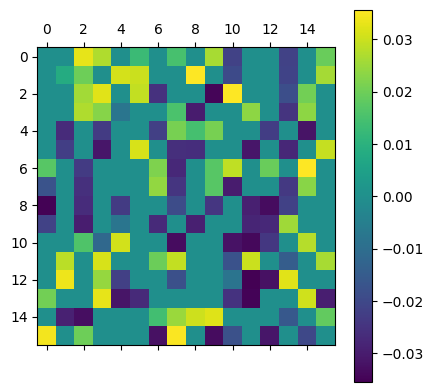

In [8]:
# mlpNet.state_dict()
Linear_1 = mlpNet.state_dict()['0.weight'].cpu()
L_1 = Linear_1[:16, :16]
plt.Figure(figsize=(30,30))
plt.matshow(L_1)
plt.colorbar()
plt.show()